### Data Wrangling

Q. Create an “Academic performance” dataset of students and perform the following operations using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("xAPI-Edu-Data.csv")

Using the `head()` method to see the format of the data.

In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,NaN,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,NaN,50.0,12.0,50,No,Bad,Above-7,M


In [ ]:
df.dtypes

gender                       object
NationalITy                  object
PlaceofBirth                 object
StageID                      object
GradeID                      object
SectionID                    object
Topic                        object
Semester                     object
Relation                     object
raisedhands                 float64
VisITedResources            float64
AnnouncementsView           float64
Discussion                    int64
ParentAnsweringSurvey        object
ParentschoolSatisfaction     object
StudentAbsenceDays           object
Class                        object
dtype: object

In [ ]:
df.shape

(480, 17)

In [ ]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,460.000000,476.000000,469.000000,480.000000
mean,46.708696,54.701681,37.897655,43.283333
std,30.919425,33.111157,26.673520,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.000000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


Checking for missing values in the dataset.

In [ ]:
df.isnull().sum()

gender                       0
NationalITy                  0
PlaceofBirth                 0
StageID                      0
GradeID                      0
SectionID                    0
Topic                       10
Semester                     0
Relation                    15
raisedhands                 20
VisITedResources             4
AnnouncementsView           11
Discussion                   0
ParentAnsweringSurvey        0
ParentschoolSatisfaction     5
StudentAbsenceDays           5
Class                       13
dtype: int64

#### raisedhands, VisITedResources, AnnouncementsView are numerical data

Imputation with mean

In [ ]:
df["raisedhands"].fillna(df["raisedhands"].mean(), inplace=True)

Imputation with median

In [ ]:
df["VisITedResources"].fillna(df["VisITedResources"].median(), inplace=True)

In [ ]:
df["AnnouncementsView"].fillna(df["AnnouncementsView"].median(), inplace=True)

### Topic, Relation, ParentschoolSatisfaction and StudentAbsenceDays are Categorical

#### Replacing with Constant

Getting the count of different values in StudentAbsenceDays Column

In [ ]:
df.StudentAbsenceDays.value_counts()

Under-7    284
Above-7    191
Name: StudentAbsenceDays, dtype: int64

Imputing the null values with a constant "Under-7" as it is the most frequent in the data

In [ ]:
df["StudentAbsenceDays"].fillna("Under-7", inplace=True)

In [ ]:
df["Relation"].fillna("Father", inplace=True)

#### Replace with most frequent (mode) using SimpleImputer
for Topic and ParentschoolSatisfaction

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(df)

array([['M', 'KW', 'KuwaIT', ..., 'Good', 'Under-7', 'M'],
       ['M', 'KW', 'KuwaIT', ..., 'Good', 'Under-7', 'M'],
       ['M', 'KW', 'KuwaIT', ..., 'Bad', 'Above-7', 'L'],
       ...,
       ['F', 'Jordan', 'Jordan', ..., 'Bad', 'Under-7', 'M'],
       ['F', 'Jordan', 'Jordan', ..., 'Bad', 'Above-7', 'L'],
       ['F', 'Jordan', 'Jordan', ..., 'Bad', 'Above-7', 'L']],
      dtype=object)

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.000000,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.000000,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.000000,7.0,0.0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.000000,65.0,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,46.708696,50.0,12.0,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5.000000,4.0,5.0,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50.000000,77.0,14.0,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55.000000,74.0,25.0,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30.000000,17.0,14.0,57,No,Bad,Above-7,L


### Outliers

Checking for Outliers using Box plots.

Text(0.5, 0, 'raisedhands')

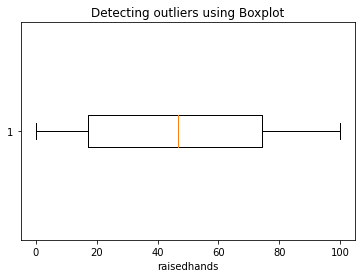

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df["raisedhands"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('raisedhands')

Text(0.5, 0, 'VisITedResources')

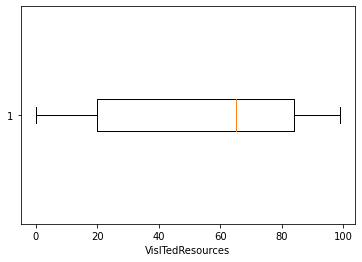

In [ ]:
plt.boxplot(df["VisITedResources"], vert=False)
plt.xlabel('VisITedResources')

Text(0.5, 0, 'AnnouncementsView')

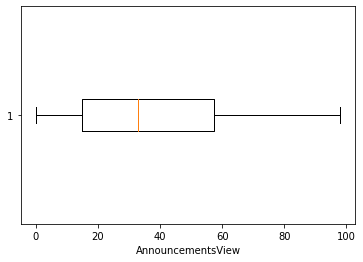

In [ ]:
plt.boxplot(df["AnnouncementsView"], vert=False)
plt.xlabel('AnnouncementsView')

Text(0.5, 0, 'Discussion')

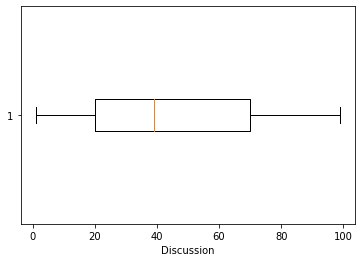

In [ ]:
plt.boxplot(df["Discussion"], vert=False)
plt.xlabel('Discussion')

There seems to be no outliers in the data.

### Creating another dataframe for Outlier detection demonstration

Using deep copy to copy the dataframe so the original dataframe is not modified when the duplicate is modified

In [ ]:
outlier_df = df.copy(deep=True)

In [ ]:
outlier_df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.000000,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.000000,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.000000,7.0,0.0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.000000,65.0,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,46.708696,50.0,12.0,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5.000000,4.0,5.0,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50.000000,77.0,14.0,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55.000000,74.0,25.0,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30.000000,17.0,14.0,57,No,Bad,Above-7,L


In [ ]:
outlier_df["raisedhands"][475] = 300.0

300.0

Here, we see an outlier which is greater than 100

Text(0.5, 0, 'raisedhands')

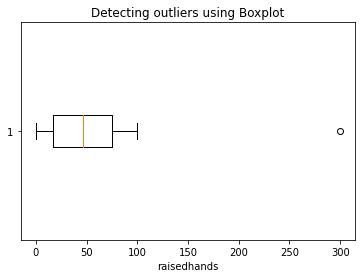

In [ ]:
plt.boxplot(outlier_df["raisedhands"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('raisedhands')

Getting records which are greater than 100

In [ ]:
outlier_df[outlier_df["raisedhands"] > 100]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,300.0,4.0,5.0,8,No,Bad,Above-7,L


Imputing the outliers with the mean.

In [ ]:
outlier_df[outlier_df["raisedhands"] > 100] = outlier_df["raisedhands"].mean()

As we see in the box plot, there are no Outliers in the raisedhands column

Text(0.5, 0, 'raisedhands')

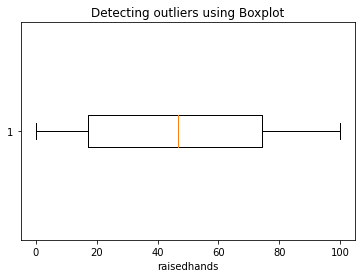

In [ ]:
plt.boxplot(outlier_df["raisedhands"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('raisedhands')

# Data Transformation

Getting all the columns which are of categorical type

In [ ]:
import numpy as np
df.select_dtypes(exclude=[np.number])

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,No,Bad,Above-7,L


Getting information about the categorical data of Relation column

In [ ]:
df.Relation.value_counts()

Father    290
Mum       190
Name: Relation, dtype: int64

Manually label encoding the data.

In [ ]:
df.Relation.replace({"Mum": 1, "Father": 2}, inplace=True)

In [ ]:
df.Relation.value_counts()

2    290
1    190
Name: Relation, dtype: int64